In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime-dataset/amazon_prime_titles.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/amazon-prime-dataset/amazon_prime_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [5]:
df.shape

(9668, 12)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
df.nunique()

show_id         9668
type               2
title           9668
director        5773
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

In [10]:
df['director'].unique()

array(['Don McKellar', 'Girish Joshi', 'Josh Webber', ...,
       'John-Paul Davidson, Stephen Warbeck', 'Emily Skye',
       'Steve Barker'], dtype=object)

In [11]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [12]:
df['director'].value_counts()

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Karyn Kusama               1
K. Subash                  1
Robert Cuffley             1
J. Sabarish                1
Steve Barker               1
Name: count, Length: 5773, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


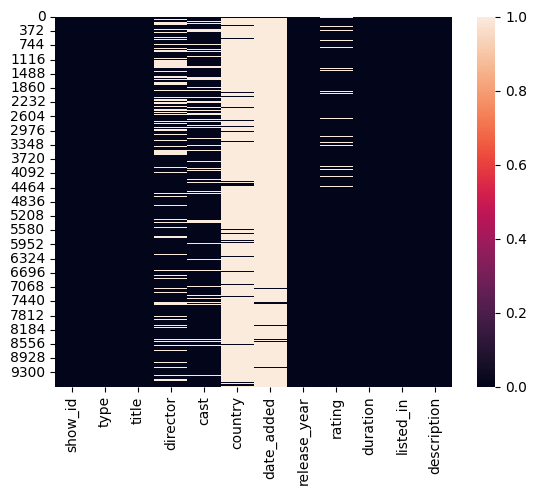

In [14]:
sns.heatmap(df.isnull())
plt.show()

# In which year highest number of tv shows and movies were released.

In [15]:
df.release_year.value_counts()

release_year
2021    1442
2020     962
2019     929
2018     623
2017     562
        ... 
1922       2
1926       2
1924       1
1923       1
1927       1
Name: count, Length: 100, dtype: int64

# How many movies and tv shows are in the dataset

In [16]:
df.type.value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

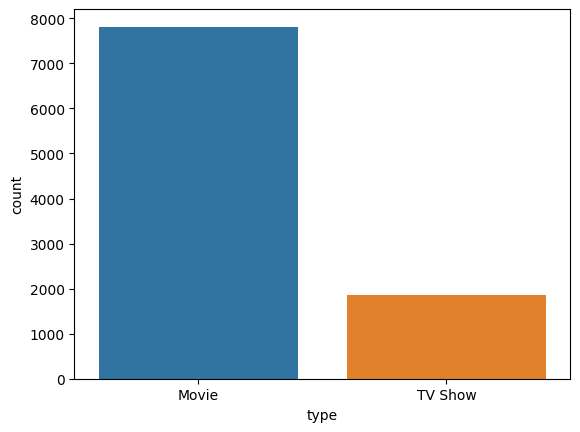

In [17]:
sns.countplot(data = df, x = df['type'])

# show all records type is "movies" and country is "United Kingdom".

In [18]:
df[(df['type']=='Movie')& (df["country"]=="United Kingdom")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
14,s15,Movie,Elon Musk: The Real Life Iron Man,Sonia Anderson,"Elon Musk, Per Wimmer, Julie Anderson-Ankenbra...",United Kingdom,"May 2, 2021",2018,NaN,74 min,Documentary,"Discover the meteoric rise of Elon Musk, the m..."
374,s375,Movie,The Zombie King,Aidan Belizaire,"Edward Furlong, Corey Feldman, George McCluskey",United Kingdom,NaN,2013,16+,96 min,"Comedy, Horror",After heartbroken widower Samuel makes a deal ...
656,s657,Movie,The Flaw,David Sington,"Andrew Luan, Robert Shiller, Louis Hyman",United Kingdom,NaN,2011,13+,81 min,Special Interest,The definitive doc on the 2008 financial crash...
892,s893,Movie,Stick Man,"Jeroen Jaspaert, Daniel Snaddon","Martin Freeman, Jennifer Saunders, Russell Tov...",United Kingdom,NaN,2015,ALL,27 min,"Adventure, Animation, Kids",A half-hour animation based on the much-loved ...
2095,s2096,Movie,Instant Death,Ara Paiaya,Lou Ferrigno,United Kingdom,NaN,2017,18+,84 min,Action,A gang war for drug dominance draws in a distu...
2364,s2365,Movie,Get Duked!,Ninian Doff,"Eddie Izzard, Kate Dickie, James Cosmo, Samuel...",United Kingdom,NaN,2020,16+,87 min,"Adventure, Comedy","Get Duked is an anarchic, hip-hop inspired com..."
2381,s2382,Movie,Gascoigne,Jane Preston,"Paul Gascoigne, Vinnie Jones, Gary Lineker, Jo...",United Kingdom,NaN,2015,16+,87 min,Documentary,Celebrating the life and achievements of natur...
2534,s2535,Movie,Everybody's Game,Beno Obano,"Maro Itoje, Beno Obano, Anthony Watson, Ellis ...",United Kingdom,NaN,2020,16+,53 min,Documentary,Coming from the most unlikely of rugby playing...


# show all records type is "movies" and director is "Paul Weiland".

In [19]:
df[(df['type']=="Movie")&(df["director"]=="Paul Weiland")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...


# show top 3 directors, who gave the highest number of tv shows and movies released on prime video

In [20]:
df['director'].value_counts().head(3)

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Name: count, dtype: int64

# In which year  highest rating ---> show in a plot

<Axes: xlabel='release_year', ylabel='rating'>

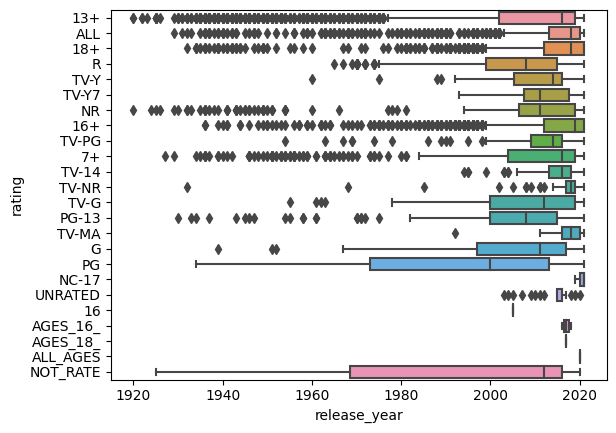

In [21]:
sns.boxplot(x = 'release_year', y = 'rating', data = df)

/tmp/ipykernel_20/4238151652.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'release_year', y = 'rating', data = df


<Axes: xlabel='release_year', ylabel='rating'>

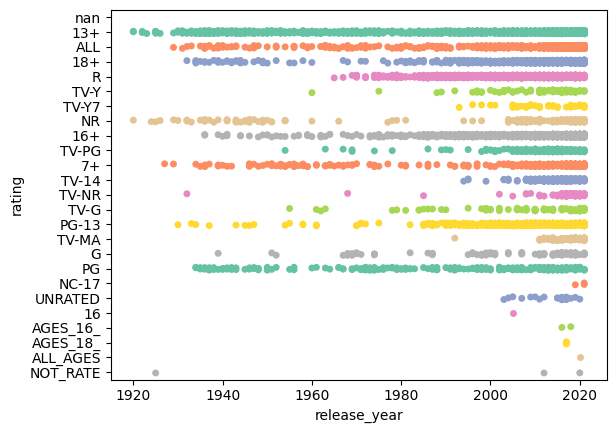

In [22]:
sns.stripplot(x = 'release_year', y = 'rating', data = df
              ,  palette ='Set2')